In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import xarray as xr
import pandas as pd
import pickle

import matplotlib.pyplot as plt
import cartopy as cart

from glob import glob
from datetime import timedelta as delta
from datetime import datetime

from parcels import (grid, Field, FieldSet, ParticleSet, JITParticle, ScipyParticle, AdvectionRK4,
                     ErrorCode, ParticleFile, Variable, plotTrajectoriesFile)

from importlib import reload
import plot
import lifeline

In [2]:
reload(plot)
reload(lifeline)

<module 'lifeline' from '/home/students/4302001/arctic-connectivity/lifeline.py'>

In [5]:
# Specify paths to velocity field and mesh
#readdir_ocean = '/Users/daanreijnders/Datasets/'
#readdir_ice = '/Users/daanreijnders/Datasets/'

readdir_ice = '/data/oceanparcels/input_data/CESM/0.1_deg/control/ice/arctic/'
readdir_ocean = '/data/oceanparcels/input_data/CESM/0.1_deg/control/ocean/arctic/'
readdir_mesh = '/scratch/DaanR/fields/'

fieldfile_ocean = 'daily_CESM_0.1degree_controlrun_year_300_arctic_region_timed.nc'
fieldfile_ice = 'monthly_icefields_CESM_0.1degree_controlrun_year_300_arctic'
meshfile = 'POP_grid_lat1800plus.nc'

writedir = ''

In [6]:
# NOT NECESSARY YET
def read_velocity_field(fieldfiles, meshfiles=None):
    if not meshfiles:
        meshfiles = fieldfiles
    filenames = {'U': {'lon': meshfiles,
                       'lat': meshfiles,
                       'data':fieldfiles},
                 'V': {'lon': meshfiles,
                       'lat': meshfiles,
                       'data':fieldfiles}}

    variables = {'U': 'UVEL_5m',
                 'V': 'VVEL_5m'}

    dimensions = {'U': {'time': 'time',
                        'lat': 'U_LAT_2D',
                        'lon': 'U_LON_2D'},
                  'V': {'time': 'time',
                        'lat': 'U_LAT_2D',
                        'lon': 'U_LON_2D'}}
    fieldset = FieldSet.from_pop(filenames, variables, dimensions, allow_time_extrapolation=False)
    fieldset.U.vmax = 10;  fieldset.U.vmin = -10;  # set max of flow to 10 m/s
    fieldset.V.vmax = 10; fieldset.V.vmin = -10;
    return fieldset

fieldset = read_velocity_field(readdir_ocean+fieldfile_ocean, readdir_mesh+meshfile)  

In [8]:
icedata = xr.open_dataset(readdir_ice+fieldfile_ice+'.nc')

In [13]:
aice = icedata['aice'] #ice area
hisnap = icedata['hisnap'] # ice volume (check if area*thickness)
hi = icedata['hi'] #thickness

In [12]:
aice.shape

(12, 600, 3600)

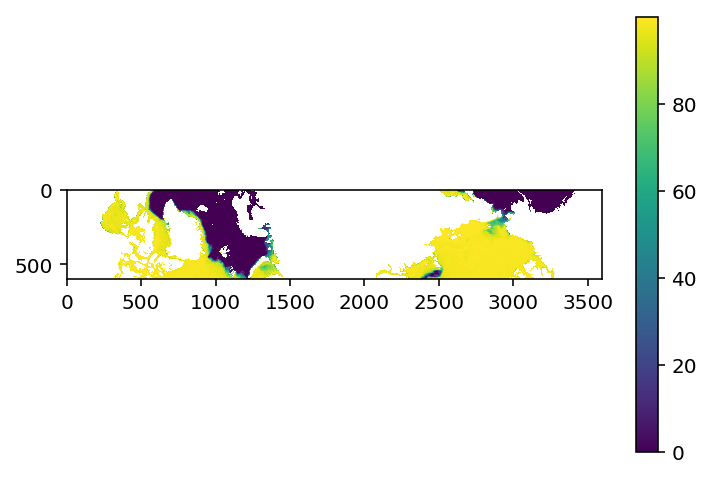

In [15]:
plt.imshow(aice[0,:,:])
plt.colorbar()

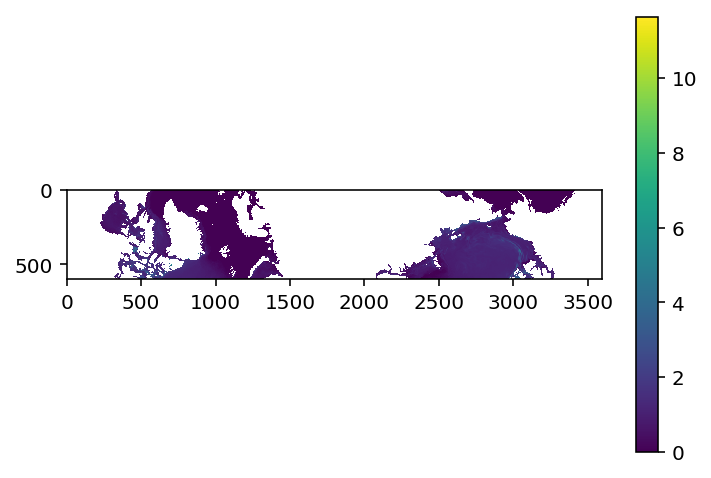

In [16]:
plt.imshow(hisnap[0,:,:])
plt.colorbar()

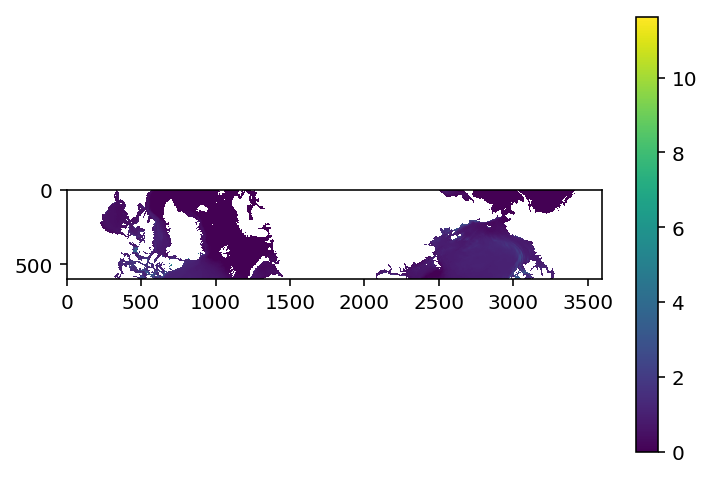

In [17]:
plt.imshow(hi[0,:,:])
plt.colorbar()

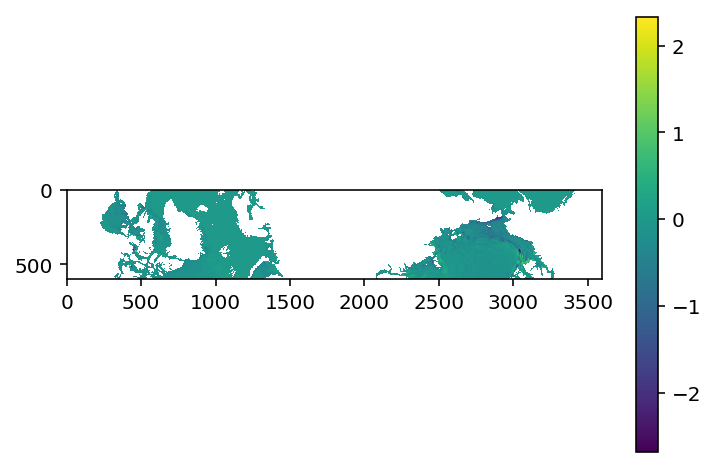

In [19]:
plt.imshow(hi[0,:,:]-hisnap[0,:,:])
plt.colorbar()

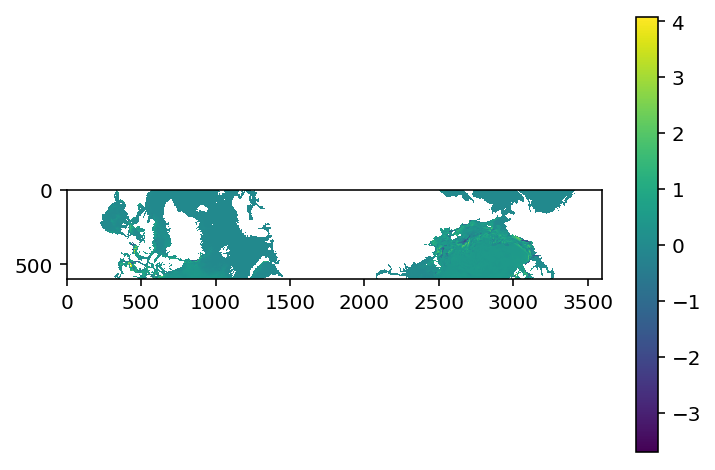

In [20]:
plt.imshow(hi[6,:,:]-hisnap[6,:,:])
plt.colorbar()